**Proyek Analisis Data : Bike-Sharing-Dataset**

**Nama**:Muhammad Fharahbi Fachri

**Email**:fharahbi04@gmail.com

**ID Dicoding** : fharahbi_lznt


1. Berapa banyak peminjam yang teregistrasi dan tidak(casual)?
2. Pada saat kapan pengguna sepeda meningkat?
3. Bagaimana pengaruh musim dan cuaca mempengaruhi orang-orang bersepeda?

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [81]:
hours_df=pd.read_csv("hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**ASSESING**

In [82]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [83]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [84]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [85]:
hours_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [86]:
print("Jumlah duplikasi:" , day_df.duplicated().sum())

Jumlah duplikasi: 0


In [87]:
print("Jumlah duplikasi:" , hours_df.duplicated().sum())

Jumlah duplikasi: 0


In [88]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [89]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**CLEANING DATA**

In [90]:
day_df.temp.value_counts()

,count
temp,
0.635000,5
0.265833,5
0.680000,4
0.710833,4
0.564167,4
...,...
0.669167,1
0.643333,1
0.707059,1


In [91]:
hours_df.temp.value_counts()

,count
temp,
0.62,726
0.66,693
0.64,692
0.70,690
0.60,675
0.36,671
0.34,645
0.30,641
0.40,614


In [92]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [93]:
hours_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


KARENA TIDAK ADA DATA TERDUPLIKASI DAN TIDAK ADA MISSING VALUE,MAKA CLEANING TIDAK DIPERLUKAN LAGI.

**EXPLORATION DATA**

In [94]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [95]:
hours_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [96]:
day_df[['casual','registered']].describe()

,casual,registered
count,731.000000,731.000000
mean,848.176471,3656.172367
std,686.622488,1560.256377
min,2.000000,20.000000
25%,315.500000,2497.000000
50%,713.000000,3662.000000
75%,1096.000000,4776.500000
max,3410.000000,6946.000000


In [97]:
hours_df[['casual','registered']].describe()

,casual,registered
count,17379.000000,17379.000000
mean,35.676218,153.786869
std,49.305030,151.357286
min,0.000000,0.000000
25%,4.000000,34.000000
50%,17.000000,115.000000
75%,48.000000,220.000000
max,367.000000,886.000000


DARI DATA YANG DIAPATKAN PADA TABEL HOURS DAN DAY,REGISTERED MEMILIKI NILAI TERTINGGI DIBANDING CASUAL,MAKA DARI ITU JAWABAN NO 1 SUDAH DIDAPATKAN

In [98]:
weather_map = {
    1: "Cerah atau Sebagian Berawan",
    2: "Berawan atau Berkabut",
    3: "Hujan Ringan atau Salju Tipis",
    4: "Hujan Deras atau Kondisi Ekstrem"
}

# Menambahkan kolom deskripsi cuaca ke dalam dataset
day_df['cuaca'] = day_df['weathersit'].map(weather_map)
hours_df['cuaca'] = hours_df['weathersit'].map(weather_map)

# Menampilkan hasilnya
day_df[['weathersit', 'cuaca']]

,weathersit,cuaca
0,2,Berawan atau Berkabut
1,2,Berawan atau Berkabut
2,1,Cerah atau Sebagian Berawan
3,1,Cerah atau Sebagian Berawan
4,1,Cerah atau Sebagian Berawan
...,...,...
726,2,Berawan atau Berkabut
727,2,Berawan atau Berkabut
728,2,Berawan atau Berkabut
729,1,Cerah atau Sebagian Berawan


In [99]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cuaca
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Berawan atau Berkabut
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Berawan atau Berkabut
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Cerah atau Sebagian Berawan
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Cerah atau Sebagian Berawan
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Cerah atau Sebagian Berawan


In [100]:
hours_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cuaca
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Cerah atau Sebagian Berawan
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Cerah atau Sebagian Berawan
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Cerah atau Sebagian Berawan
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Cerah atau Sebagian Berawan
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Cerah atau Sebagian Berawan


MENGUBAH KOLOM WEATHERSIT YANG AWALNYA DARI ANGKA MENJADI DESKRIPSI

In [101]:
hours_df[['holiday','weekday','workingday']].value_counts()

holiday  weekday  workingday
0        6        0             2512
         0        0             2502
         3        1             2451
         5        1             2439
         2        1             2430
         4        1             2423
         1        1             2122
1        1        0              357
         4        0               48
         5        0               48
         3        0               24
         2        0               23
Name: count, dtype: int64

In [102]:
day_df[['holiday','weekday','workingday']].value_counts()

holiday  weekday  workingday
0        0        0             105
         6        0             105
         2        1             103
         3        1             103
         4        1             102
         5        1             102
         1        1              90
1        1        0              15
         4        0               2
         5        0               2
         2        0               1
         3        0               1
Name: count, dtype: int64

KITA LIHAT BAHWA DARI KE 2 TABEL,JUMLAH PESEPEDA PADA HARI KERJA LEBIH BANYAK DIBANDING HARI LIBURAN,YANG MANA BAGIAN INI MENJAWAB NO 2

In [103]:
day_df.groupby('cuaca').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': ['sum','mean']
})

casual registered      cnt             
                                  sum        sum      sum         mean
cuaca                                                                 
Berawan atau Berkabut          169776     827082   996858  4035.862348
Cerah atau Sebagian Berawan    446346    1811606  2257952  4876.786177
Hujan Ringan atau Salju Tipis    3895      33974    37869  1803.285714

In [104]:
hours_df.groupby('cuaca').agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': ['sum','mean']
})

casual registered      cnt            
                                     sum        sum      sum        mean
cuaca                                                                   
Berawan atau Berkabut             134481     661471   795952  175.165493
Cerah atau Sebagian Berawan       462745    1875428  2338173  204.869272
Hujan Deras atau Kondisi Ekstrem       8        215      223   74.333333
Hujan Ringan atau Salju Tipis      22783     135548   158331  111.579281

JAWABAN NO 3 DIDAPATKAN,BAHWA CUACA/MUSIM MEMPENGARUHI JUMLAH BANYAKNYA PESEPEDA.CERAH ATAU SEBAGIAN BERAWAN MEMILIKI JUMLAH DAN RATA-RATA PALING TINGGI

**VIZUALITATION & EXPLANATORY DATA ANALYSIS**

**PERTANYAAN 1: Berapa banyak peminjam yang teregistrasi dan tidak(casual)?**

<ipython-input-105-4ae535b2dcaf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pengguna.index,y=pengguna.values, palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

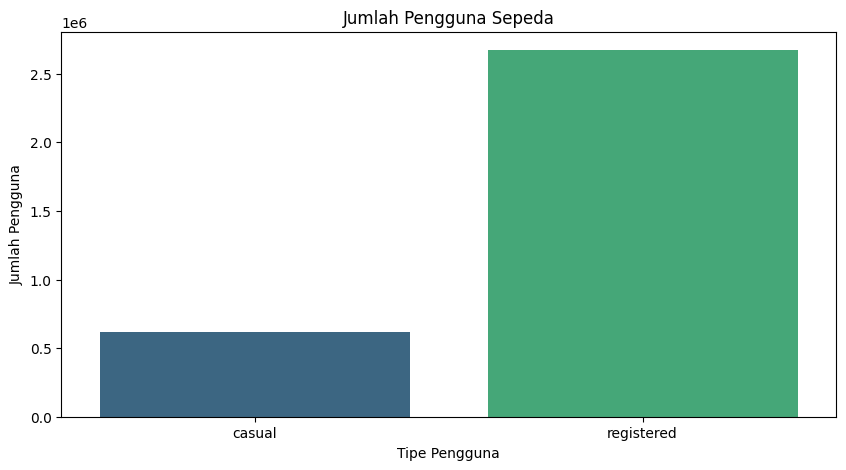

In [105]:
pengguna=hours_df[['casual','registered']].sum()
plt.figure(figsize=(10,5))
sns.barplot(x=pengguna.index,y=pengguna.values, palette='viridis')
plt.title('Jumlah Pengguna Sepeda')
plt.xlabel('Tipe Pengguna')
plt.ylabel('Jumlah Pengguna')
plt.show

**PERTANYAAN 2: Pada saat kapan pengguna sepeda meningkat?**

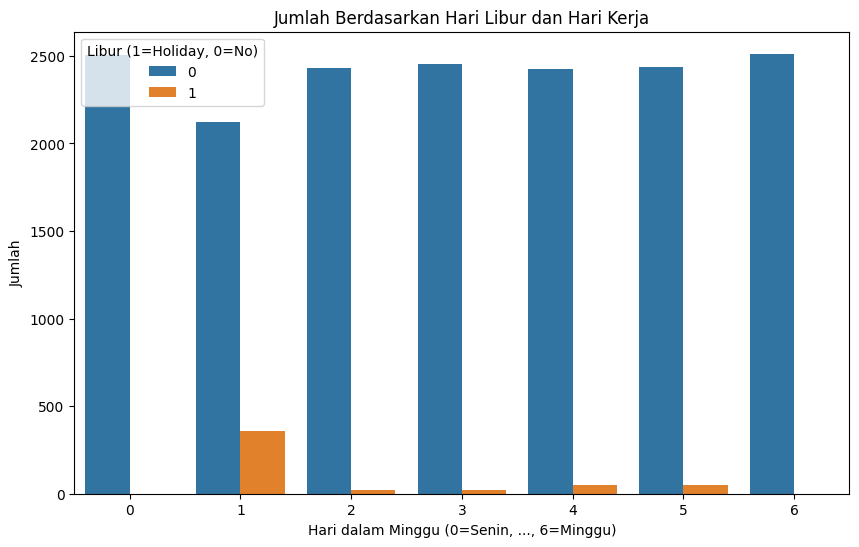

In [106]:
counts = hours_df[['holiday', 'weekday']].value_counts().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='weekday', y='count', hue='holiday')
plt.title('Jumlah Berdasarkan Hari Libur dan Hari Kerja')
plt.xlabel('Hari dalam Minggu (0=Senin, ..., 6=Minggu)')
plt.ylabel('Jumlah')
plt.legend(title='Libur (1=Holiday, 0=No)')
plt.show()


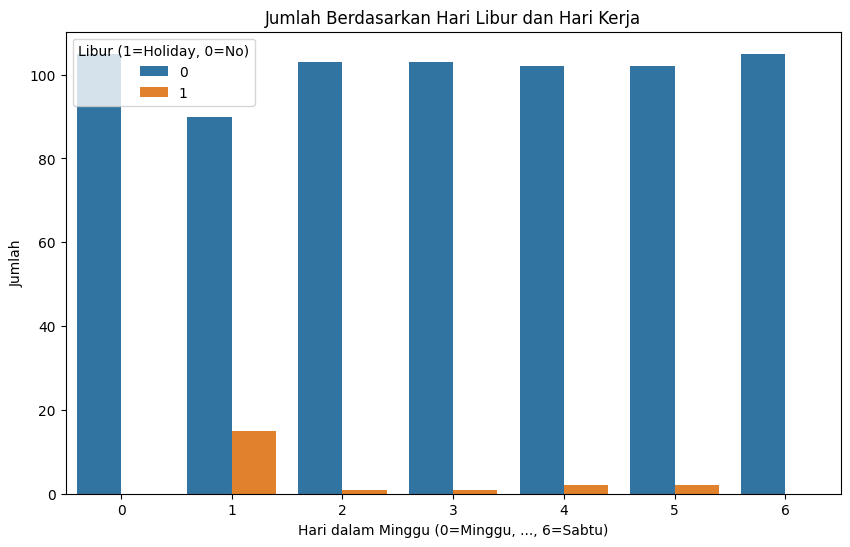

In [107]:
counts = day_df[['holiday', 'weekday']].value_counts().reset_index(name='count')
plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='weekday', y='count', hue='holiday')
plt.title('Jumlah Berdasarkan Hari Libur dan Hari Kerja')
plt.xlabel('Hari dalam Minggu (0=Minggu, ..., 6=Sabtu)')
plt.ylabel('Jumlah')
plt.legend(title='Libur (1=Holiday, 0=No)')
plt.show()

**PERTANYAAN 3: Bagaimana pengaruh musim dan cuaca mempengaruhi orang-orang bersepeda?**

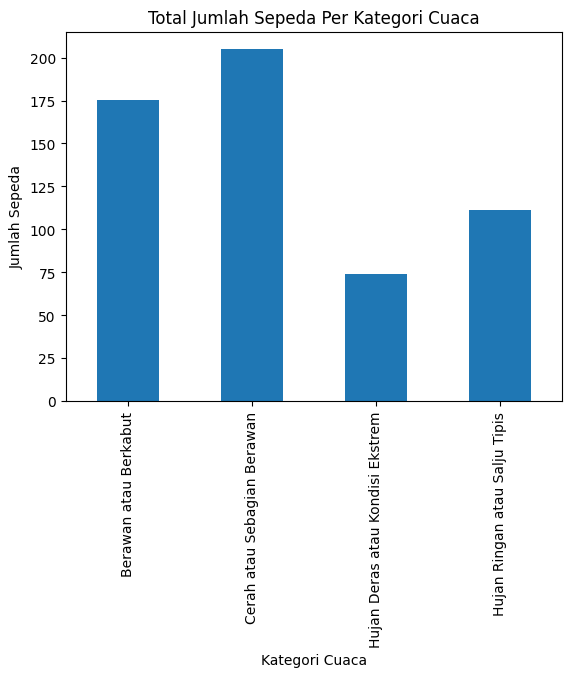

In [108]:
# Group by 'cuaca' dan agregasi data
grouped_df = hours_df.groupby('cuaca').agg(
    casual=('casual', 'sum'),
    registered=('registered', 'sum'),
    cnt=('cnt', 'mean')
)

# Buat bar chart untuk jumlah total 'cnt'
grouped_df['cnt'].plot(kind='bar')
plt.title('Total Jumlah Sepeda Per Kategori Cuaca')
plt.xlabel('Kategori Cuaca')
plt.ylabel('Jumlah Sepeda')
plt.show()


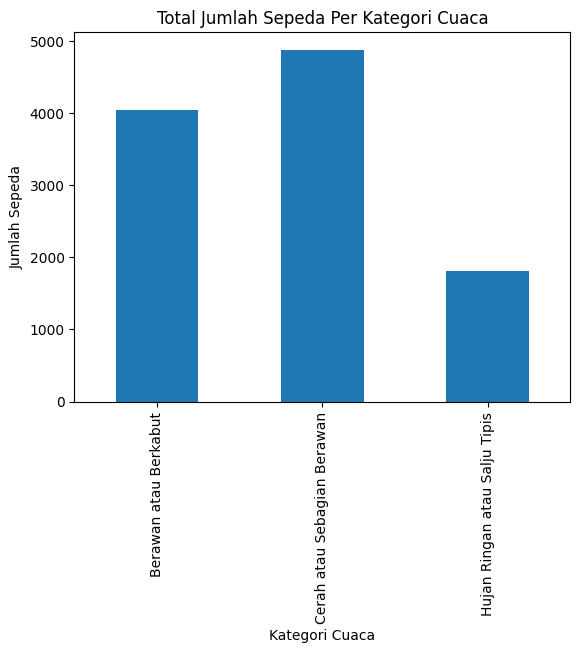

In [109]:
grouped_df = day_df.groupby('cuaca').agg(
    casual=('casual', 'sum'),
    registered=('registered', 'sum'),
    cnt=('cnt', 'mean')
)

# Buat bar chart untuk jumlah total 'cnt'
grouped_df['cnt'].plot(kind='bar')
plt.title('Total Jumlah Sepeda Per Kategori Cuaca')
plt.xlabel('Kategori Cuaca')
plt.ylabel('Jumlah Sepeda')
plt.show()

<ipython-input-110-283a0d097733>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-110-283a0d097733>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


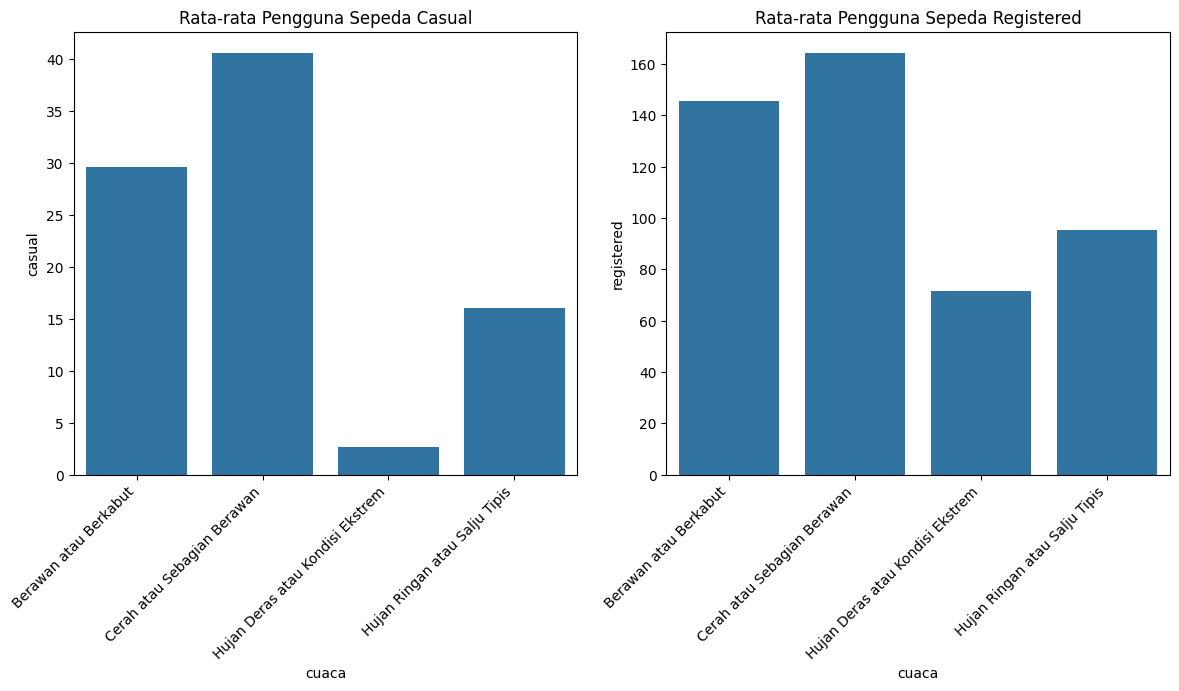

In [110]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
casual_df = hours_df.groupby('cuaca').agg(casual=('casual', 'mean'))
registered_df = hours_df.groupby('cuaca').agg(registered=('registered', 'mean'))
sns.barplot(data=casual_df, x=casual_df.index, y='casual', ax=axs[0])
sns.barplot(data=registered_df, x=registered_df.index, y='registered', ax=axs[1])
axs[0].set_title('Rata-rata Pengguna Sepeda Casual')
axs[1].set_title('Rata-rata Pengguna Sepeda Registered')
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

<ipython-input-111-d1eabf293f40>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-111-d1eabf293f40>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


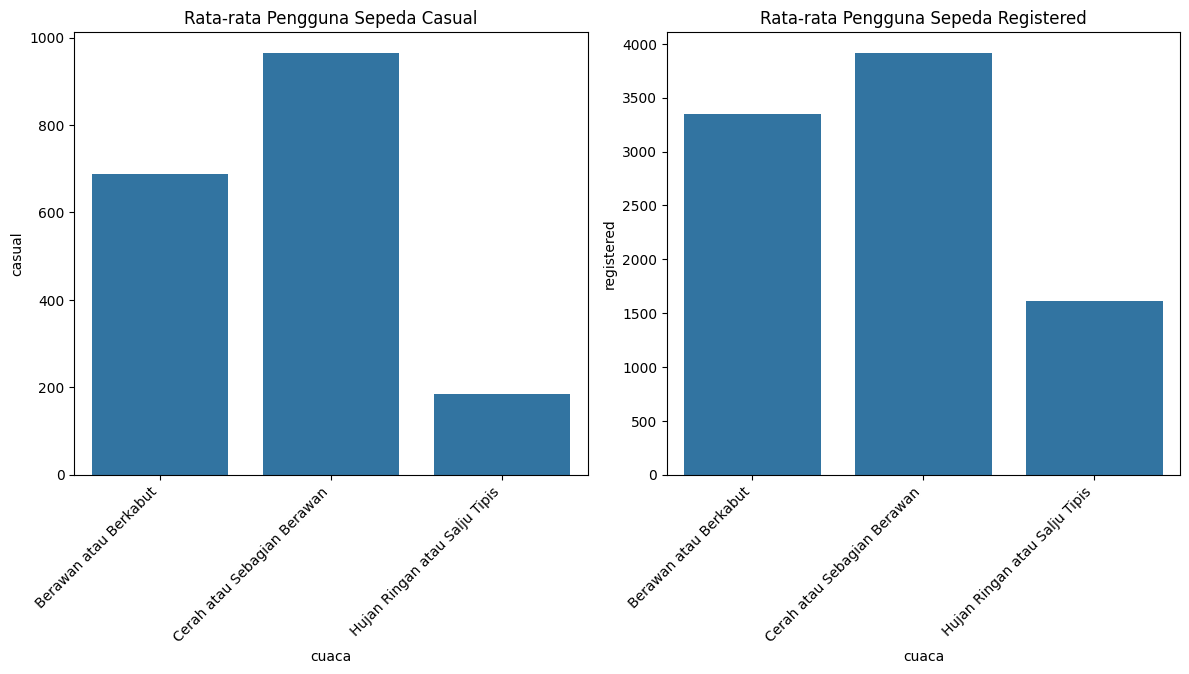

In [111]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
casual_df = day_df.groupby('cuaca').agg(casual=('casual', 'mean'))
registered_df = day_df.groupby('cuaca').agg(registered=('registered', 'mean'))
sns.barplot(data=casual_df, x=casual_df.index, y='casual', ax=axs[0])
sns.barplot(data=registered_df, x=registered_df.index, y='registered', ax=axs[1])
axs[0].set_title('Rata-rata Pengguna Sepeda Casual')
axs[1].set_title('Rata-rata Pengguna Sepeda Registered')
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

**CONCLUSION**

**PERTANYAAN 1**:
JADI PEMINJAM SEPEDA/PENGGUNA SEPEDA TERBANYAK ADALAH MEREKA YANG TELAH TEREGISTER.

**PERTANYAAN 2**:
PENGGUNAAN SEPEDA MEINGKAT PADA HARI BIASA/HARI KERJA,BUKAN PADA SAAT HOLIDAY.

**PERTANYAAN 3**:
CUACA DAN MUSIM BERPENGARUH UNTUK ORANG-ORANG MEMINJAM ATAU MEMAKAI SEPEDA,KARENA DIDAPATKAN BAHWA JUMLAH PEMAKAIAN LEBIH BANYAK SAAT CUACA CERAH DAN AKAN TURUN APABILA MEMASUKI MUSIM PENGHUJAN.